Bagging is an ensemble method involving training the same algorithm many times using different subsets sampled from the training data. In this chapter, you'll understand how bagging can be used to create a tree ensemble. You'll also learn how the random forests algorithm can lead to further ensemble diversity through randomization at the level of each split in the trees forming the ensemble.

In [15]:
# Importing course packages; you can add more too!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

# Importing course datasets as DataFrames
auto = pd.read_csv('../datasets/auto.csv')
bikes = pd.read_csv('../datasets/bikes.csv')
liver_disease = pd.read_csv('../datasets/indian_liver_patient_preprocessed.csv', index_col=0)
wbc = pd.read_csv('../datasets/wbc.csv') # Wisconsin Breast Cancer Dataset

# Bagging

### Define the bagging classifier

In the following exercises you'll work with the Indian Liver Patient dataset from the UCI machine learning repository. Your task is to predict whether a patient suffers from a liver disease using 10 features including Albumin, age and gender. You'll do so using a Bagging Classifier.

[sklearn.ensemble.BaggingClassifier Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)

[sklearn.tree.DecisionTreeClassifier Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [3]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)

### Evaluate Bagging performance

Now that you instantiated the bagging classifier, it's time to train it and evaluate its test set accuracy.

The Indian Liver Patient dataset is processed for you and split into 80% train and 20% test. The feature matrices ```X_train``` and ```X_test```, as well as the arrays of labels ```y_train``` and ```y_test``` are available in your workspace. In addition, we have also loaded the bagging classifier bc that you instantiated in the previous exercise and the function ```accuracy_score()``` from ```sklearn.metrics```.

In [10]:
# Set up the enviornmentfor the lesson.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

y = liver_disease['Liver_disease'] # target
X = liver_disease.drop('Liver_disease', axis='columns') # features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of bc: {:.2f}'.format(acc_test)) 

Test set accuracy of bc: 0.62


# Out of Bag Evaluation

### Prepare the ground

In the following exercises, you'll compare the OOB accuracy to the test set accuracy of a bagging classifier trained on the Indian Liver Patient dataset.

In sklearn, you can evaluate the OOB accuracy of an ensemble classifier by setting the parameter ```oob_score``` to ```True``` during instantiation. After training the classifier, the OOB accuracy can be obtained by accessing the ```.oob_score_``` attribute from the corresponding instance.

In your environment, we have made available the class ```DecisionTreeClassifier``` from ```sklearn.tree```.

In [12]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, 
                       n_estimators=50,
                       oob_score=True,
                       random_state=1)

### OOB Score vs Test Set Score

Now that you instantiated ```bc```, you will fit it to the training set and evaluate its test set and OOB accuracies.

The dataset is processed for you and split into 80% train and 20% test. The feature matrices ```X_train``` and ```X_test```, as well as the arrays of labels ```y_train``` and ```y_test``` are available in your workspace. In addition, we have also loaded the classifier ```bc``` instantiated in the previous exercise and the function ```accuracy_score()``` from ```sklearn.metrics```.

In [13]:
# Fit bc to the training set 
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
acc_test = accuracy_score(y_test, y_pred)

# Evaluate OOB accuracy
acc_oob = bc.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

Test set accuracy: 0.647, OOB accuracy: 0.724


# Random Forests (RF)

### Train an RF regressor

In the following exercises you'll predict bike rental demand in the Capital Bikeshare program in Washington, D.C using historical weather data from the Bike Sharing Demand dataset available through Kaggle. For this purpose, you will be using the random forests algorithm. As a first step, you'll define a random forests regressor and fit it to the training set.

The dataset is processed for you and split into 80% train and 20% test. The features matrix ```X_train``` and the array ```y_train``` are available in your workspace.

[sklearn.ensemble.RandomForestRegressor Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

In [16]:
from sklearn.model_selection  import train_test_split

y = bikes['cnt']# target
X = bikes.drop('cnt', axis='columns')# features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor(n_estimators=25,
                           random_state=2)
            
# Fit rf to the training set    
rf.fit(X_train, y_train) 

RandomForestRegressor(n_estimators=25, random_state=2)

### Evaluate the RF regressor

You'll now evaluate the test set RMSE of the random forests regressor ```rf``` that you trained in the previous exercise.

The dataset is processed for you and split into 80% train and 20% test. The features matrix ```X_test```, as well as the array ```y_test``` are available in your workspace. In addition, we have also loaded the model ```rf``` that you trained in the previous exercise.

In [18]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 57.66


### Visualizing features importances

In this exercise, you'll determine which features were the most predictive according to the random forests regressor rf that you trained in a previous exercise.

For this purpose, you'll draw a horizontal barplot of the feature importance as assessed by ```rf```. Fortunately, this can be done easily thanks to plotting capabilities of pandas.

We have created a pandas.Series object called importances containing the feature names as index and their importances as values. In addition, ```matplotlib.pyplot``` is available as```plt``` and ```pandas``` as ```pd```.

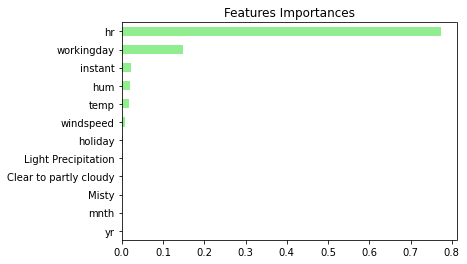

In [19]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()